In [2]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.4/51.4 KB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 KB 18.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.0/111.0 KB 15.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 117.0 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
  

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf

# For time stamps
from datetime import datetime

# Set up End and Start times for data grab
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN', 'TSLA', "NVDA"]

end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)

company_list = [AAPL, GOOG, MSFT, AMZN, TSLA, NVDA] # 변수에 저장
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON", "TESLA", "NVIDIA"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name

df = pd.concat(company_list, axis=0)
df.tail(10)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2023-01-06 00:00:00-05:00,144.740005,150.100006,140.339996,148.589996,148.589996,40482300,NVIDIA
2023-01-09 00:00:00-05:00,152.839996,160.559998,151.410004,156.279999,156.279999,50423100,NVIDIA
2023-01-10 00:00:00-05:00,155.070007,159.619995,154.720001,159.089996,159.089996,38410100,NVIDIA
2023-01-11 00:00:00-05:00,158.399994,160.279999,155.630005,160.009995,160.009995,35328500,NVIDIA
2023-01-12 00:00:00-05:00,161.000000,166.369995,154.919998,165.110001,165.110001,55140900,NVIDIA
2023-01-13 00:00:00-05:00,162.779999,169.220001,161.649994,168.990005,168.990005,44693500,NVIDIA
2023-01-17 00:00:00-05:00,168.990005,177.279999,168.990005,177.020004,177.020004,51110200,NVIDIA
2023-01-18 00:00:00-05:00,176.669998,178.729996,172.820007,173.770004,173.770004,43962400,NVIDIA
2023-01-19 00:00:00-05:00,170.360001,171.970001,167.309998,167.649994,167.649994,45250100,NVIDIA


In [4]:
# Summary Stats
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,152.670159,154.773611,150.583175,152.737857,152.334254,8.694396e+07
std,13.235847,13.152372,13.257184,13.274101,13.072335,2.407423e+07
min,126.010002,127.769997,124.169998,125.019997,125.019997,3.519590e+07
25%,142.355000,144.515003,140.330006,142.619999,142.236546,7.057985e+07
50%,151.200005,153.745003,149.349998,151.250000,151.104507,8.237830e+07
75%,163.867504,166.232498,162.002502,164.064999,163.401943,9.603402e+07
max,178.550003,179.610001,176.699997,178.960007,178.154037,1.826020e+08


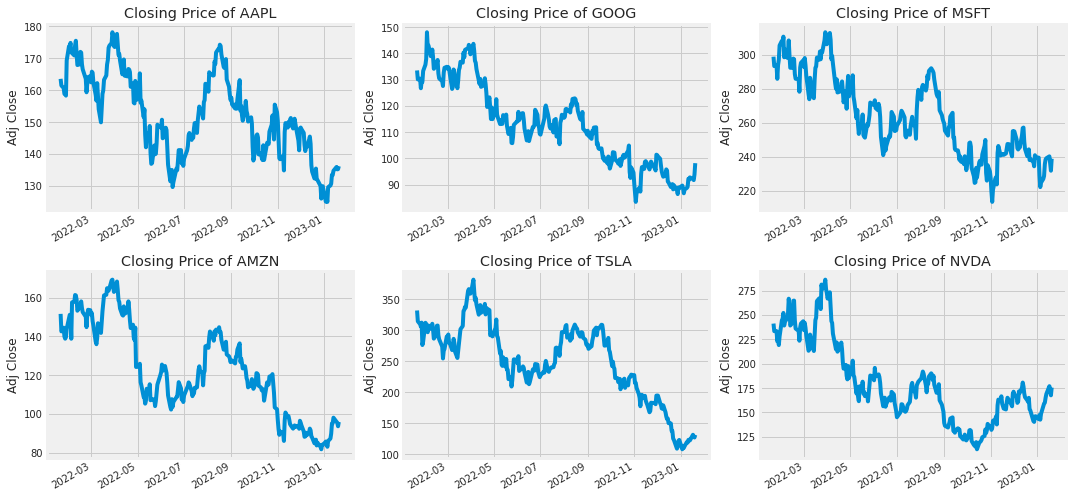

In [5]:
# Let's see a historical view of the closing price
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(3, 3, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")

plt.tight_layout()

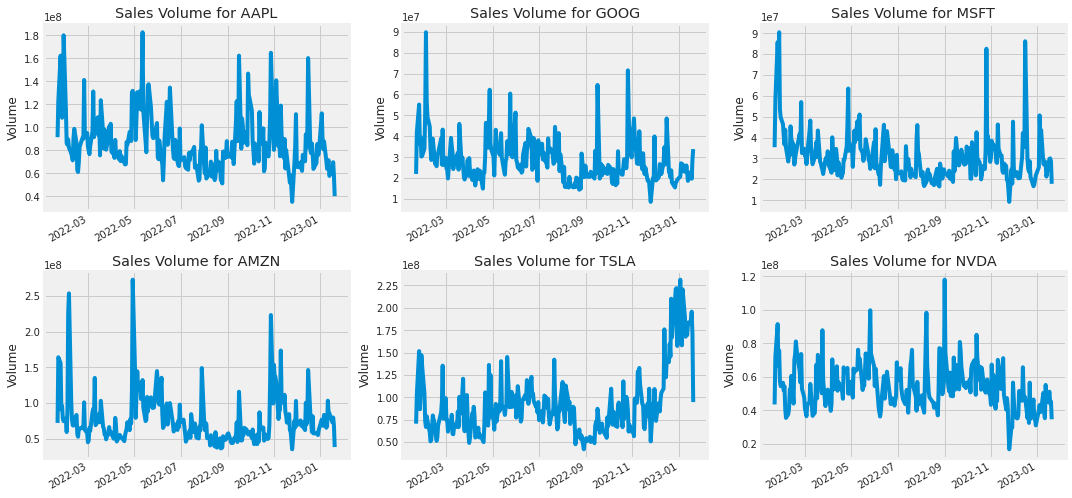

In [6]:
# Now let's plot the total volume of stock being traded each day
# 일간 거래량
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(3, 3, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")

plt.tight_layout()

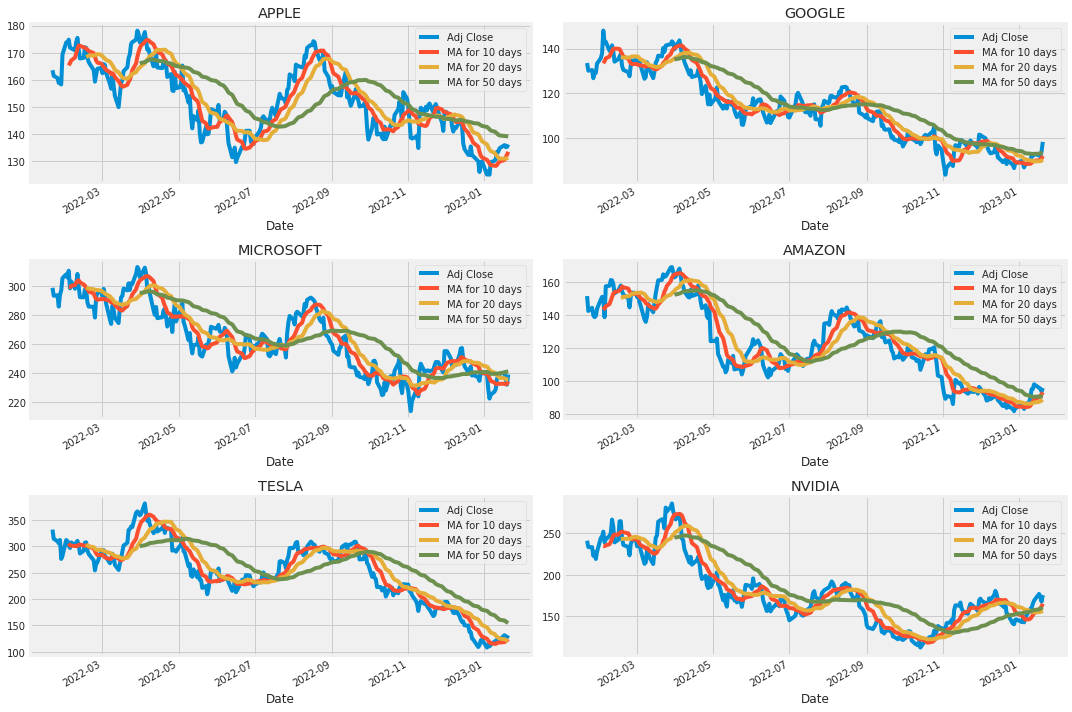

In [7]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()


fig, axes = plt.subplots(nrows=3, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

TSLA[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[2,0])
axes[2,0].set_title('TESLA')

NVDA[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[2,1])
axes[2,1].set_title('NVIDIA')

fig.tight_layout()

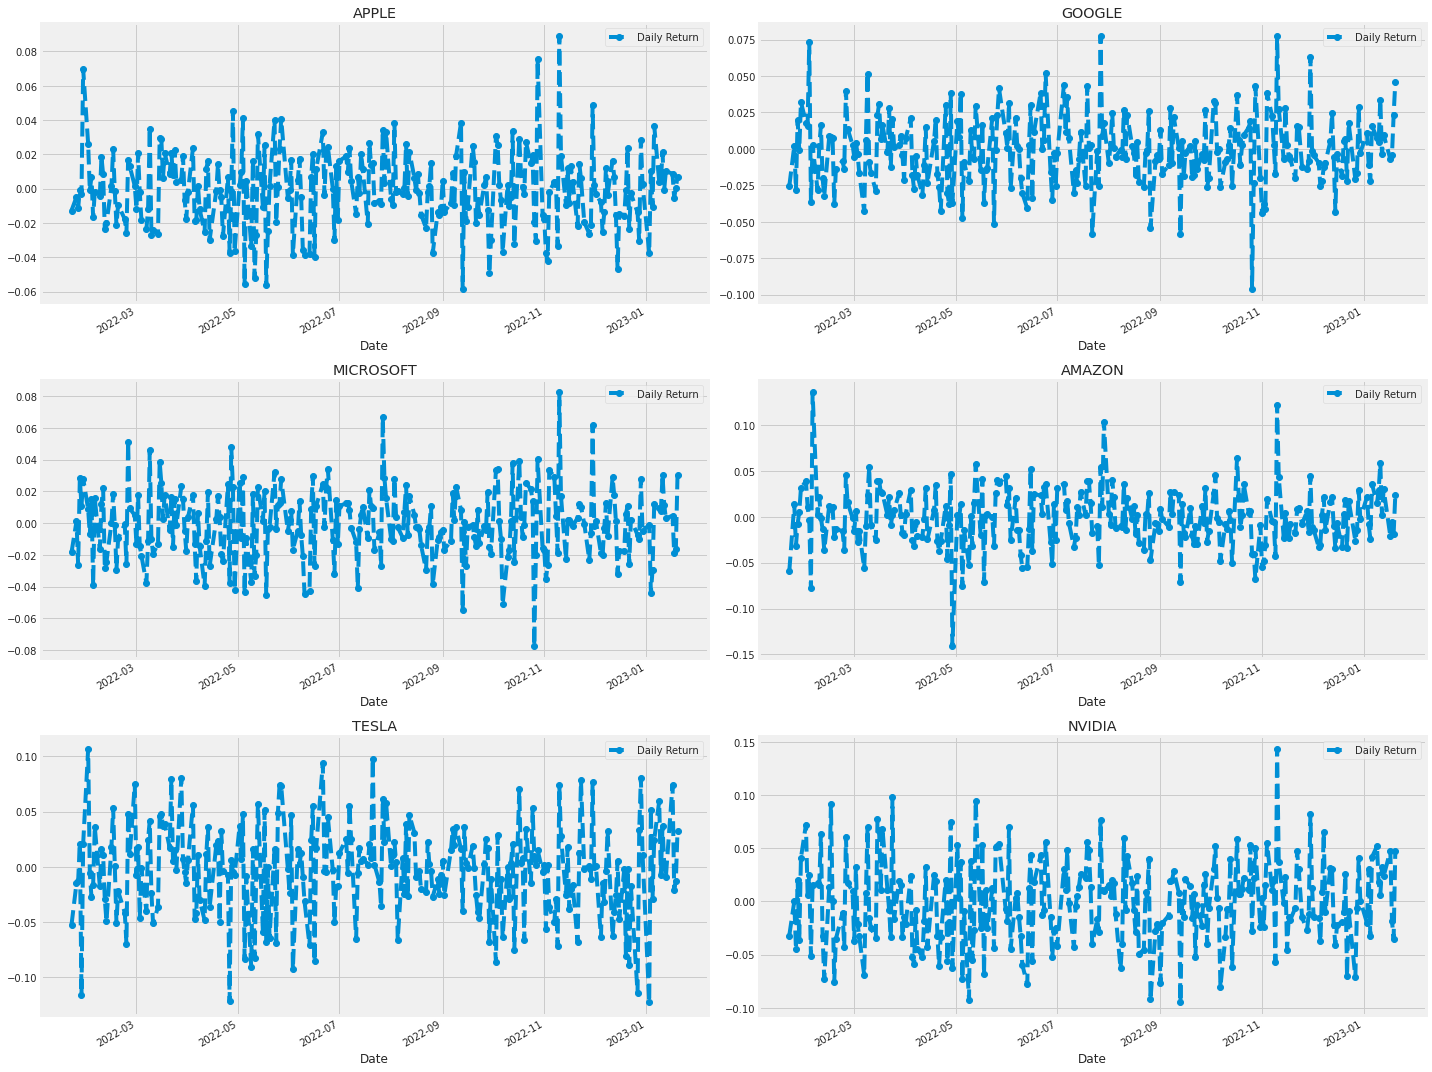

In [8]:
# We'll use pct_change to find the percent change for each day
# 일간 등락률
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=3, ncols=2)
fig.set_figheight(15)
fig.set_figwidth(20)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')

TSLA['Daily Return'].plot(ax=axes[2,0], legend=True, linestyle='--', marker='o')
axes[2,0].set_title('TESLA')

NVDA['Daily Return'].plot(ax=axes[2,1], legend=True, linestyle='--', marker='o')
axes[2,1].set_title('NVIDIA')


fig.tight_layout()

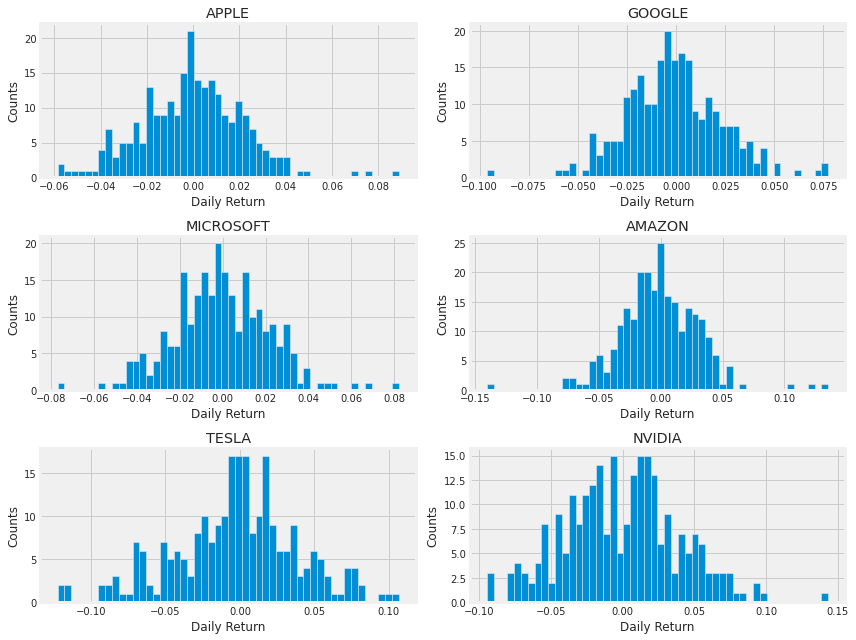

In [9]:
plt.figure(figsize=(12, 9))

for i, company in enumerate(company_list, 1):
    plt.subplot(3, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name[i - 1]}')

plt.tight_layout()

In [10]:
from pandas_datareader import data as pdr
yf.pdr_override()
# Grab all the closing prices for the tech stock list into one DataFrame
# closing_df = DataReader(tech_list, 'yahoo', start="2022-01-01")['Adj Close']
closing_df = pdr.get_data_yahoo(tech_list,start="2022-01-20", progress = False)['Adj Close']
# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()

,AAPL,AMZN,GOOG,MSFT,NVDA,TSLA
Date,,,,,,
2022-01-20 00:00:00-05:00,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-21 00:00:00-05:00,-0.012765,-0.059502,-0.025576,-0.018468,-0.032132,-0.052566
2022-01-24 00:00:00-05:00,-0.004864,0.013327,0.002152,0.001148,-0.000086,-0.014726
2022-01-25 00:00:00-05:00,-0.011385,-0.031534,-0.027893,-0.026588,-0.044840,-0.012473
2022-01-26 00:00:00-05:00,-0.000563,-0.007954,0.019762,0.028493,0.020068,0.020699


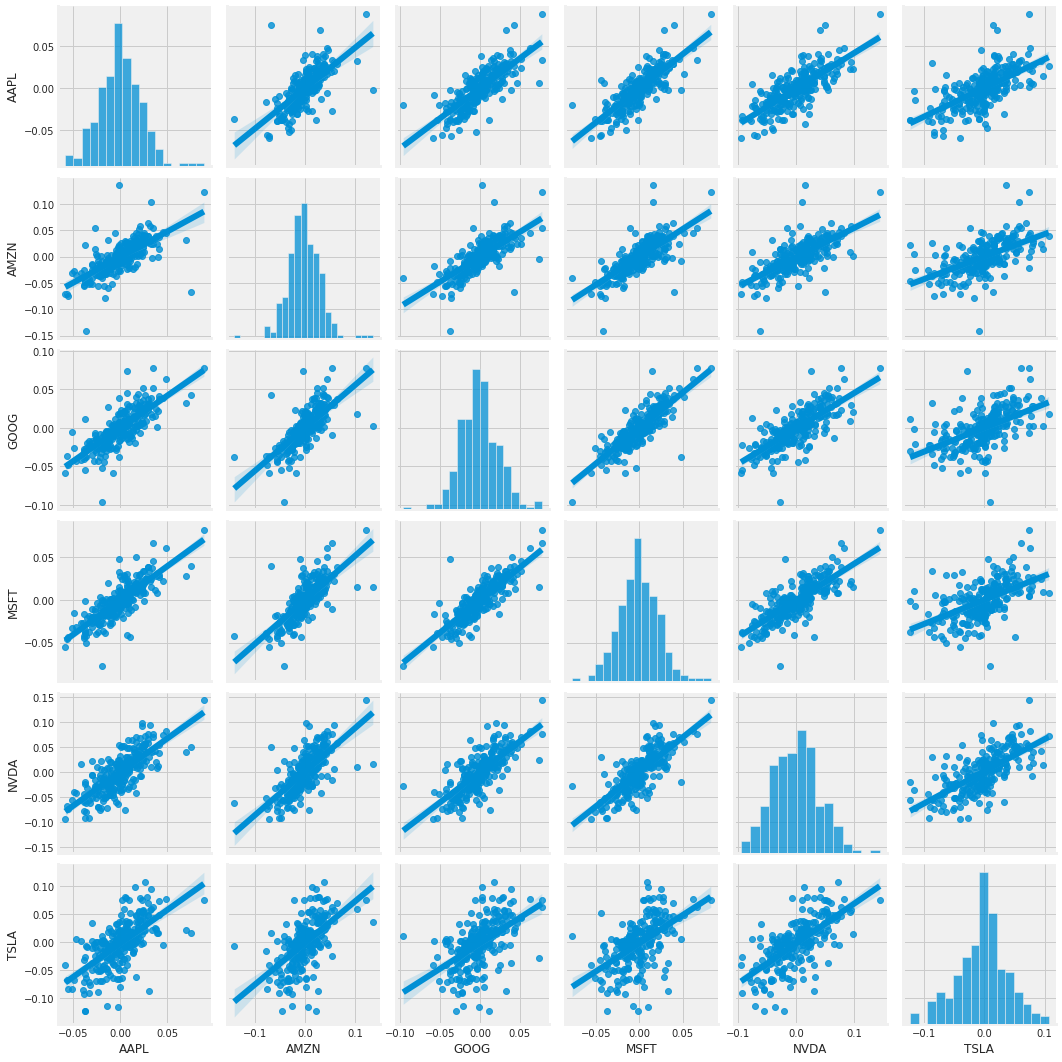

In [11]:
# 각 데이터의 상관관계 분석하기
sns.pairplot(tech_rets, kind='reg')

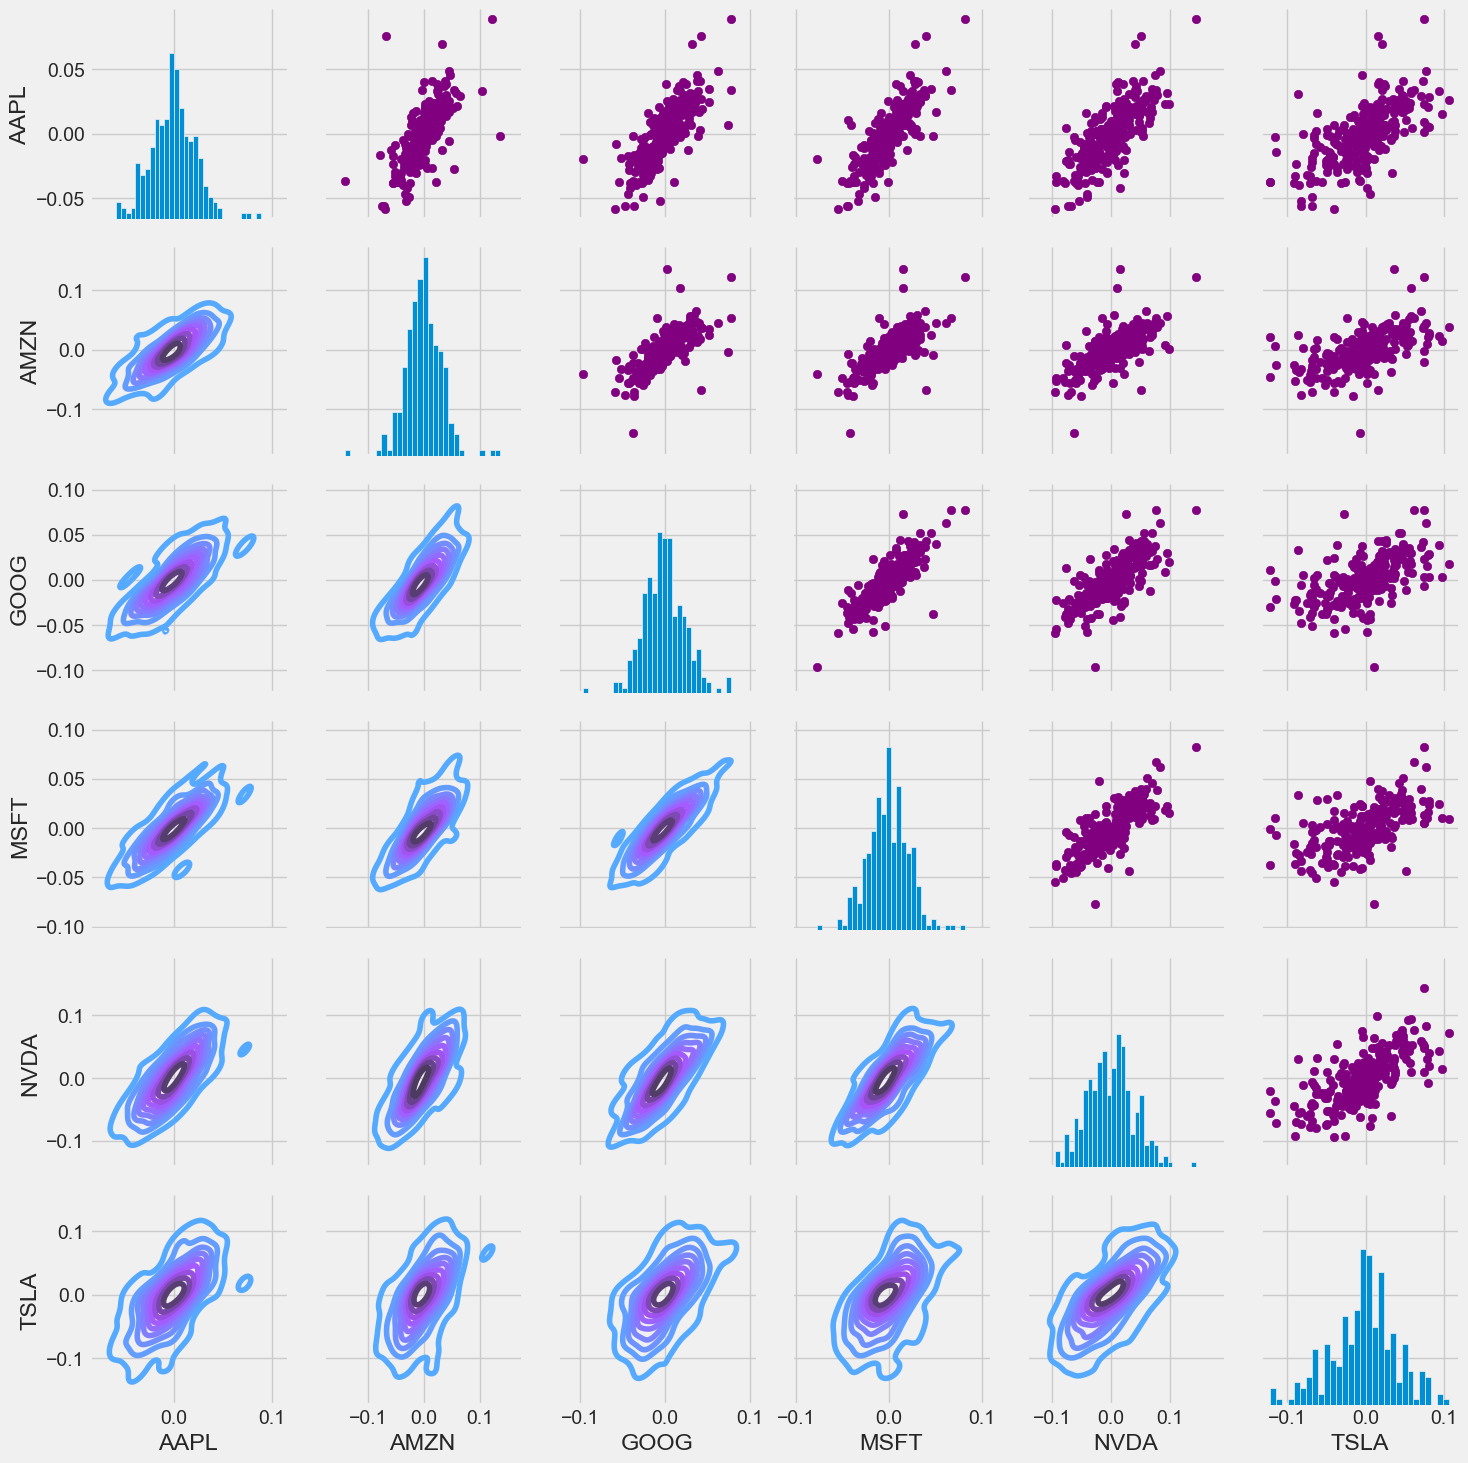

In [ ]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde)
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

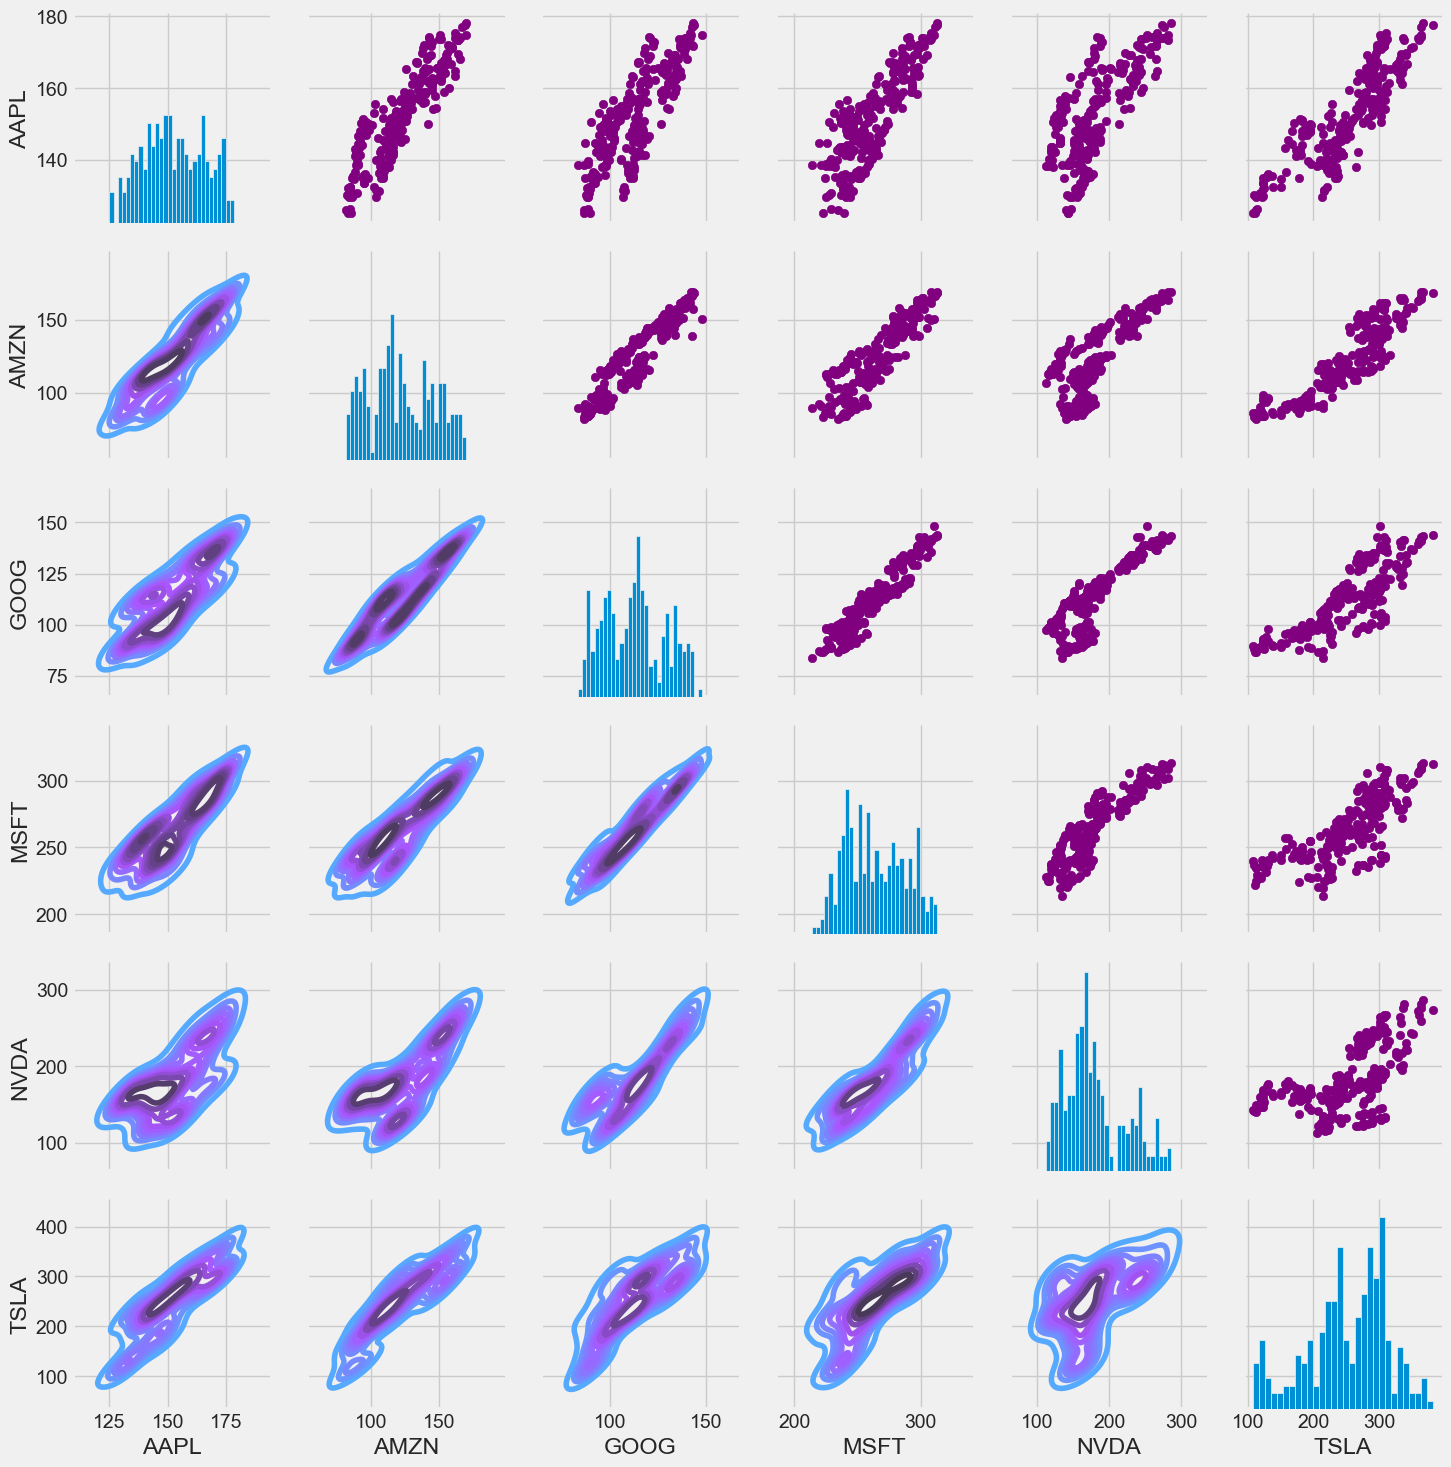

In [ ]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

Text(0.5, 1.0, 'Correlation of stock closing price')

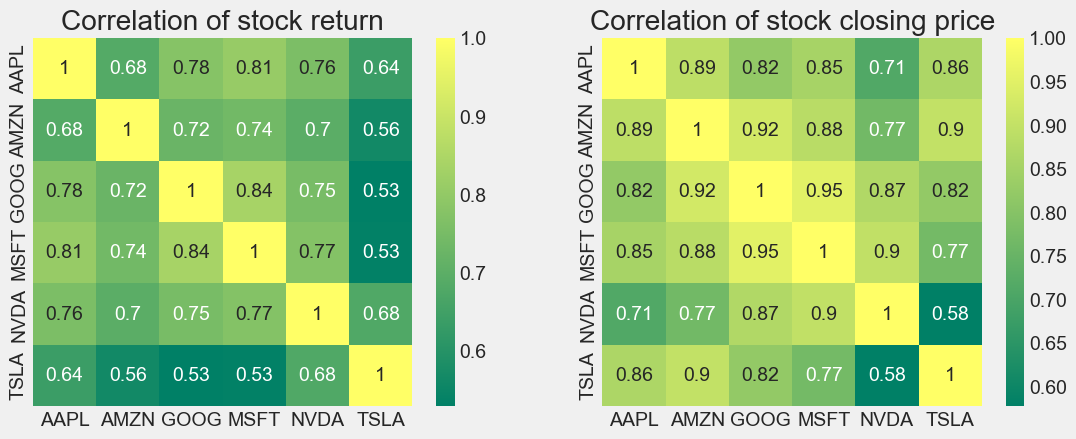

In [ ]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock closing price')

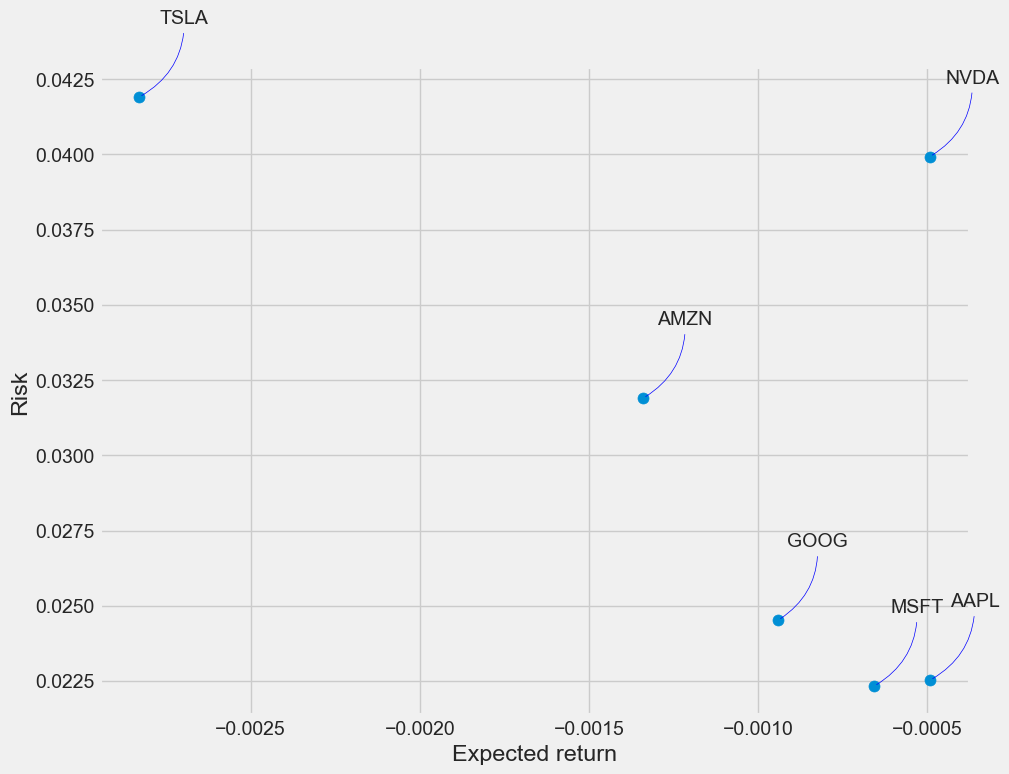

In [ ]:
rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

In [12]:
# Get the stock quote
df = pdr.get_data_yahoo("TSLA",start="2019-01-01", progress = False)
# Show teh data
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02 00:00:00-05:00,20.406668,21.008667,19.920000,20.674667,20.674667,174879000
2019-01-03 00:00:00-05:00,20.466667,20.626667,19.825333,20.024000,20.024000,104478000
2019-01-04 00:00:00-05:00,20.400000,21.200001,20.181999,21.179333,21.179333,110911500
2019-01-07 00:00:00-05:00,21.448000,22.449333,21.183332,22.330667,22.330667,113268000
2019-01-08 00:00:00-05:00,22.797333,22.934000,21.801332,22.356667,22.356667,105127500
...,...,...,...,...,...,...
2023-01-13 00:00:00-05:00,116.550003,122.629997,115.599998,122.400002,122.400002,180439300
2023-01-17 00:00:00-05:00,125.699997,131.699997,125.019997,131.490005,131.490005,186477000
2023-01-18 00:00:00-05:00,136.559998,136.679993,127.010002,128.779999,128.779999,195680300


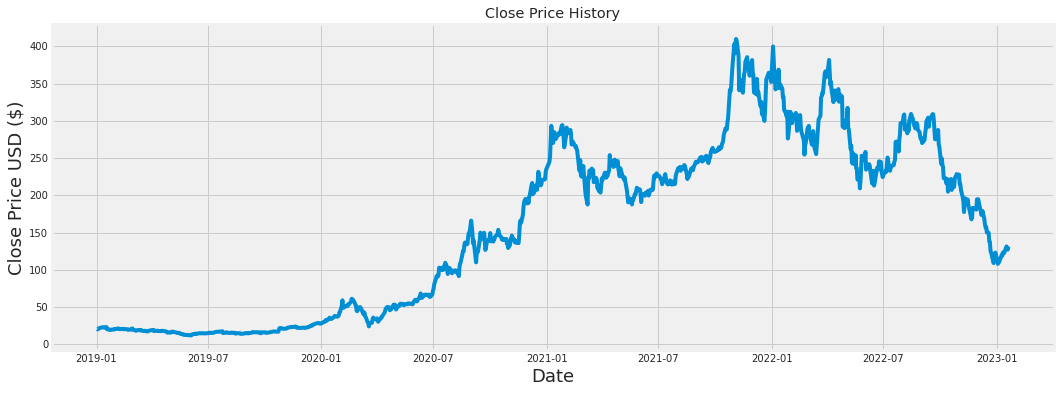

In [13]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [15]:
# Create a new dataframe with only the 'Close column
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

970

In [16]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.02196604],
       [0.02033136],
       [0.02323392],
       ...,
       [0.29356109],
       [0.28951626],
       [0.29984266]])

In [17]:
# Create the training data set
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.02196604, 0.02033136, 0.02323392, 0.02612644, 0.02619176,
       0.02672437, 0.02780299, 0.02818654, 0.02603265, 0.02771255,
       0.02798388, 0.02819492, 0.02064959, 0.02009018, 0.01819254,
       0.01884909, 0.0197753 , 0.01966476, 0.01984565, 0.02173993,
       0.02144683, 0.02231609, 0.02242998, 0.02384693, 0.02315521,
       0.0215289 , 0.0212425 , 0.02242161, 0.02224909, 0.02163944,
       0.02090249, 0.02159087, 0.02121569, 0.02069984, 0.01880219,
       0.01938505, 0.02006505, 0.01991264, 0.02273984, 0.02360072,
       0.01939845, 0.01781904, 0.0163418 , 0.01629155, 0.01635017,
       0.01761471, 0.01875027, 0.01748407, 0.018422  , 0.01858949,
       0.01615588, 0.01516101, 0.01482268, 0.01584938, 0.01591973,
       0.01433026, 0.01364189, 0.01487293, 0.01605539, 0.01669017])]
[0.016897857710496657]

[array([0.02196604, 0.02033136, 0.02323392, 0.02612644, 0.02619176,
       0.02672437, 0.02780299, 0.02818654, 0.02603265, 0.02771255,
       0.02798388, 0.02819492, 0.0

In [18]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

910/910 [==============================] - 18s 17ms/step - loss: 0.0034


In [41]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len-60: , :]

# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

2/2 [==============================] - 0s 16ms/step


10.872237090763376

<ipython-input-42-0cdd5e68a3a9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


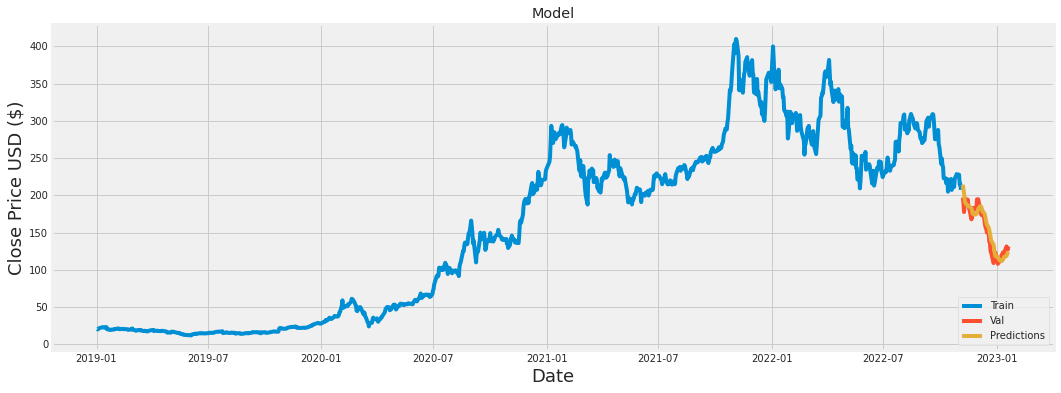

In [42]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [43]:
valid['Predictions']

Date
2022-11-07 00:00:00-05:00    214.146561
2022-11-08 00:00:00-05:00    208.938721
2022-11-09 00:00:00-05:00    202.811035
2022-11-10 00:00:00-05:00    195.146088
2022-11-11 00:00:00-05:00    189.849777
2022-11-14 00:00:00-05:00    187.347839
2022-11-15 00:00:00-05:00    185.980942
2022-11-16 00:00:00-05:00    185.975998
2022-11-17 00:00:00-05:00    185.582382
2022-11-18 00:00:00-05:00    184.517593
2022-11-21 00:00:00-05:00    182.825836
2022-11-22 00:00:00-05:00    179.252975
2022-11-23 00:00:00-05:00    175.561249
2022-11-25 00:00:00-05:00    174.294937
2022-11-28 00:00:00-05:00    174.421356
2022-11-29 00:00:00-05:00    175.284271
2022-11-30 00:00:00-05:00    176.091568
2022-12-01 00:00:00-05:00    178.778503
2022-12-02 00:00:00-05:00    181.996674
2022-12-05 00:00:00-05:00    185.012970
2022-12-06 00:00:00-05:00    185.596497
2022-12-07 00:00:00-05:00    184.428741
2022-12-08 00:00:00-05:00    181.643463
2022-12-09 00:00:00-05:00    178.344864
2022-12-12 00:00:00-05:00    176.09